# **Human Activity Detection**
Detecting huamn activites in an image or a video.

**Aim of the project:** To detect various activity of human beings such as dancing, cooking and riding a bike using neural netwroks.

**Technologies used:** Python and YOLOV8

**Sources:** Used open source images for labelling using LabelImg

Mounting the google drive through which dataset can be impotred

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Installing ultralytics for YOLO

In [ ]:
pip install ultralytics

In [ ]:
from ultralytics import YOLO

The dataset used for this project is custom data, which is taken from internet and then manually labelled with LabelImg




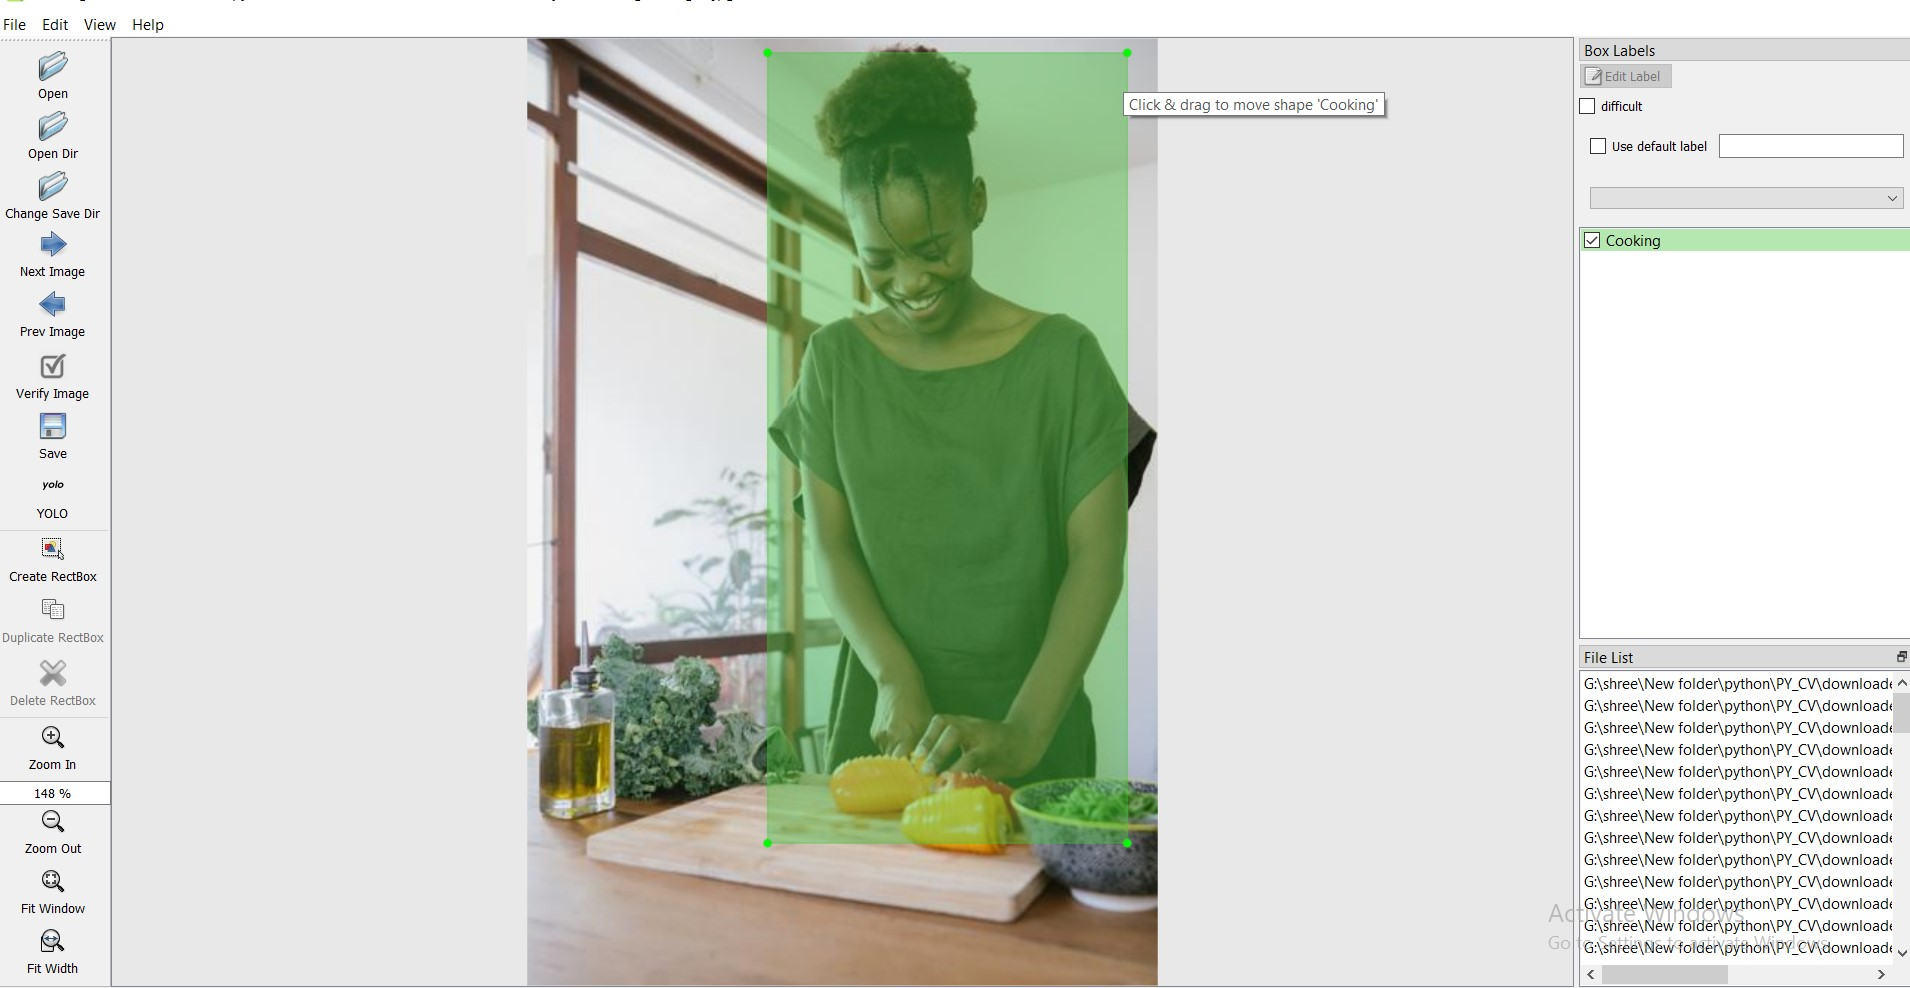

Each image size is of **640x640** as per YOLOV8 Standard.

**Directory**:

Activity Dectection
<br>.
<br>train...............................valid.............................test
<br>.
<br>images, labels.........images, labels.............images, labels

* Creating a main folder named Activity Detection
* create sub folders as **train**, **test** and **valid**.
* Each of these subfolders should contain **images** and **labels** folder such that all the annoted images should be in **images** folder and **labels** contains the annotation information or the bounding box information.

Lastly add data.yaml file which contains path and number of classes and their names.

**Detection using pre-trained models**
<br>Yolov8 is used for detection with its pre trained model yolov8s.

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=../content/data.yaml epochs=50 imgsz=640 plots = True

100% 21.5M/21.5M [00:00<00:00, 311MB/s]
Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=../content/drive/MyDrive/Datasets/Activity3/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, re

**Validating the data**
<br>Validation on val test set where weights are obtained from previous train set

In [ ]:
!yolo task=detect mode=val model=/content/best.pt data=../content/data.yaml epochs=50 imgsz=640 plots = True

Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Datasets/Activity3/valid/labels.cache... 25 images, 0 backgrounds, 0 corrupt: 100% 25/25 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.43it/s]
                   all         25         27      0.902      0.836      0.949      0.601
               Cooking         25         10      0.989        0.6      0.888      0.448
               Dancing         25         11      0.868      0.909      0.963      0.567
           Riding Bike         25          6      0.848          1      0.995      0.789
Speed: 10.0ms preprocess, 27.4ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


**Prediction on test set**
<br>Predicting on unseen data which is test set.

In [ ]:
!yolo task=detect mode=predict model=/content/best.pt conf = 0.25 source=../content/test/images

Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/39 /content/../content/drive/MyDrive/Datasets/Activity3/test/images/ckng77.jpg: 448x640 1 Cooking, 67.3ms
image 2/39 /content/../content/drive/MyDrive/Datasets/Activity3/test/images/ckng78.jpg: 640x448 1 Cooking, 69.1ms
image 3/39 /content/../content/drive/MyDrive/Datasets/Activity3/test/images/ckng79.jpg: 448x640 2 Cookings, 13.8ms
image 4/39 /content/../content/drive/MyDrive/Datasets/Activity3/test/images/ckng80.jpg: 448x640 1 Cooking, 13.0ms
image 5/39 /content/../content/drive/MyDrive/Datasets/Activity3/test/images/ckng81.jpg: 448x640 1 Cooking, 12.9ms
image 6/39 /content/../content/drive/MyDrive/Datasets/Activity3/test/images/ckng82.jpg: 448x640 (no detections), 12.9ms
image 7/39 /content/../content/drive/MyDrive/Datasets/Activity3/test/images/ckng83.jpg: 448x640 1 Cooking, 12.9ms
image 8/39 /content/../co

**Predicting on a video**

In [ ]:
!yolo task=detect mode=predict model=/content/best.pt conf = 0.25 source=../content/cdr.mp4

Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (1/293) /content/../content/cdr.mp4: 384x640 (no detections), 87.6ms
video 1/1 (2/293) /content/../content/cdr.mp4: 384x640 (no detections), 11.2ms
video 1/1 (3/293) /content/../content/cdr.mp4: 384x640 (no detections), 11.1ms
video 1/1 (4/293) /content/../content/cdr.mp4: 384x640 (no detections), 11.2ms
video 1/1 (5/293) /content/../content/cdr.mp4: 384x640 (no detections), 11.2ms
video 1/1 (6/293) /content/../content/cdr.mp4: 384x640 1 Dancing, 11.2ms
video 1/1 (7/293) /content/../content/cdr.mp4: 384x640 (no detections), 11.2ms
video 1/1 (8/293) /content/../content/cdr.mp4: 384x640 (no detections), 11.2ms
video 1/1 (9/293) /content/../content/cdr.mp4: 384x640 1 Cooking, 11.2ms
video 1/1 (10/293) /content/../content/cdr.mp4: 384x640 1 Cooking, 11.2ms
video 1/1 (11/293) /content/../content/cdr.mp4: 384x640 1